# wavelet example 3 ECG

In [6]:
import pywt.data
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.rcParams['font.size'] = 18

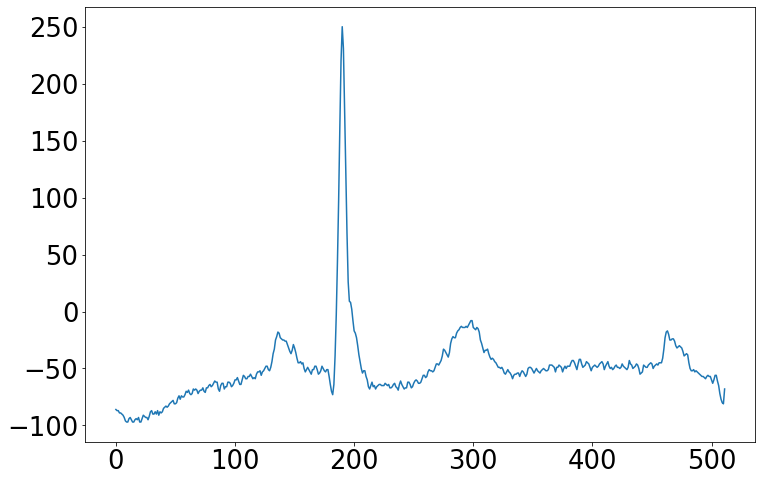

In [8]:
signal = pywt.data.ecg()[:512]
plt.plot(signal)
plt.show()

In [15]:
#De taille 512=2^9 le signal pourrait être décomposé jusqu'au 9eme niveau, 
# mais on se limite à 6 soit une réduction par 64=2^6.

w = pywt.Wavelet("db1")
coeffs = pywt.wavedec(signal, w, level=6)


def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)


# attention "wavedec" retourne les coefficients les plus grossiers en premiers (cA^J,cD^J) 
# puis les details de plus en plus fins 𝑐𝐷𝐽−1,𝑐𝐷𝐽−2...𝑐𝐷1. 
# De plus python a[0:2] retourne a[0] et a[1]



Attention "wavedec" retourne les coefficients les plus grossiers en premiers (cA^J,cD^J) puis les details de plus en plus fins 𝑐𝐷𝐽−1,𝑐𝐷𝐽−2...𝑐𝐷1. De plus python a[0:2] retourne a[0] et a[1]



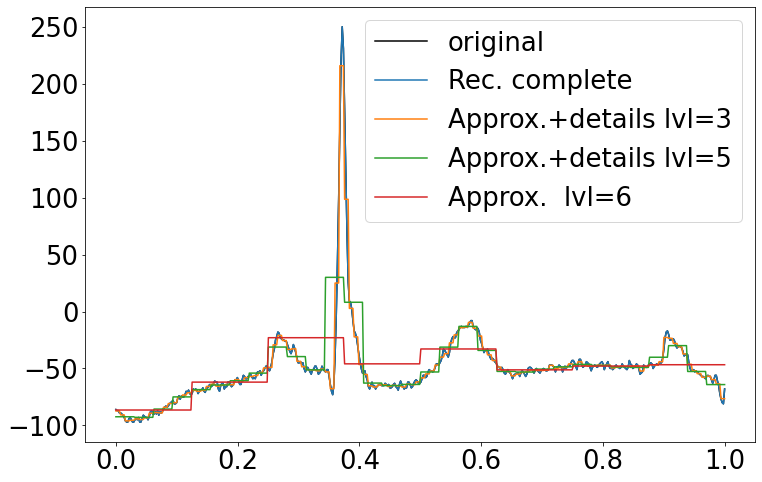

In [10]:
#plt.figure(figsize=(8,8))
plt.plot(np.linspace(0, 1, len(signal)),signal,"k-",label="original")
                  
reconstruction_plot(pywt.waverec(coeffs, w), label="Rec. complete")
coeffs[6] = np.zeros_like(coeffs[6])
coeffs[5] = np.zeros_like(coeffs[5])
reconstruction_plot(pywt.waverec(coeffs, w),label="Approx.+details lvl=3")
coeffs[4] = np.zeros_like(coeffs[4])
coeffs[3] = np.zeros_like(coeffs[3])
reconstruction_plot(pywt.waverec(coeffs[0:3] + [None] * 4, w), label="Approx.+details lvl=5")
coeffs[2] = np.zeros_like(coeffs[2])
coeffs[1] = np.zeros_like(coeffs[1])
reconstruction_plot(pywt.waverec(coeffs[0:1] + [None] * 6, w),label="Approx.  lvl=6")
plt.legend()

In [11]:
[None]*4

[None, None, None, None]

In [13]:
coeffs[0:3] + [None] * 4

[array([-691.625, -495.75 , -183.875, -367.375, -263.   , -409.625,
        -382.875, -373.625]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 None,
 None,
 None,
 None]

In [14]:
coeffs[0:1] + [None] * 6

[array([-691.625, -495.75 , -183.875, -367.375, -263.   , -409.625,
        -382.875, -373.625]),
 None,
 None,
 None,
 None,
 None,
 None]